# Machine Learning Homework: Pima Indian Diabetes Dataset

    Erisha Aryanti
    erishaaryanti@gmail.com

Build machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.

Assessment Parameters: <br>
- Dataset Preparation (5%) <br>
- EDA for the dataset (10%) <br>
- Metrics evaluations (20%) <br>
- Model Validation (20%) <br>
- The step how you find the best machine learning model (25%) <br>
- Explore More Code (20%)

### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score#, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, RobustScaler
from imblearn.over_sampling import SMOTE

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint, uniform as sp_uniform

### Import Dataset

Link for dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

**DATASET FEATURES** <br>
**Pregnancies**: Number of pregnant months <br>
**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
**BloodPressure**: Diastolic blood pressure (mm Hg) <br>
**SkinThickness**: Triceps skin fold thickness (mm) <br>
**Insulin**: 2-Hour serum insulin (mu U/ml) <br>
**BMI**: Body mass index (weight in kg/(height in m)^2) <br>
**DiabetesPedigreeFunction**: Diabetes pedigree function <br>
**Age**: Age (years) <br>
**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [45]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
# Checking null value for each variable
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
#Checking number of zero values from each variable
(df == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Although all variables doesn't have any missing value, some of them have zero values which we are going to replace with each corresponding median value. But before that since some variables have a large amount of zero values and we want the clearer view distribution graphs for EDA, temporarily the features with zero values will only be replaced with null value.

In [50]:
#Replace zero values with null values:
zerofields = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zerofields] = df[zerofields].replace(0, np.nan)

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1. Exploratory Data Analysis

## 1.1 Outcome Percentage

In [52]:
df['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

From all patients, 65.1% of them is tested negative diabetes and 34.9% of them tested positive diabetes.

## 1.2 Distribution Plot

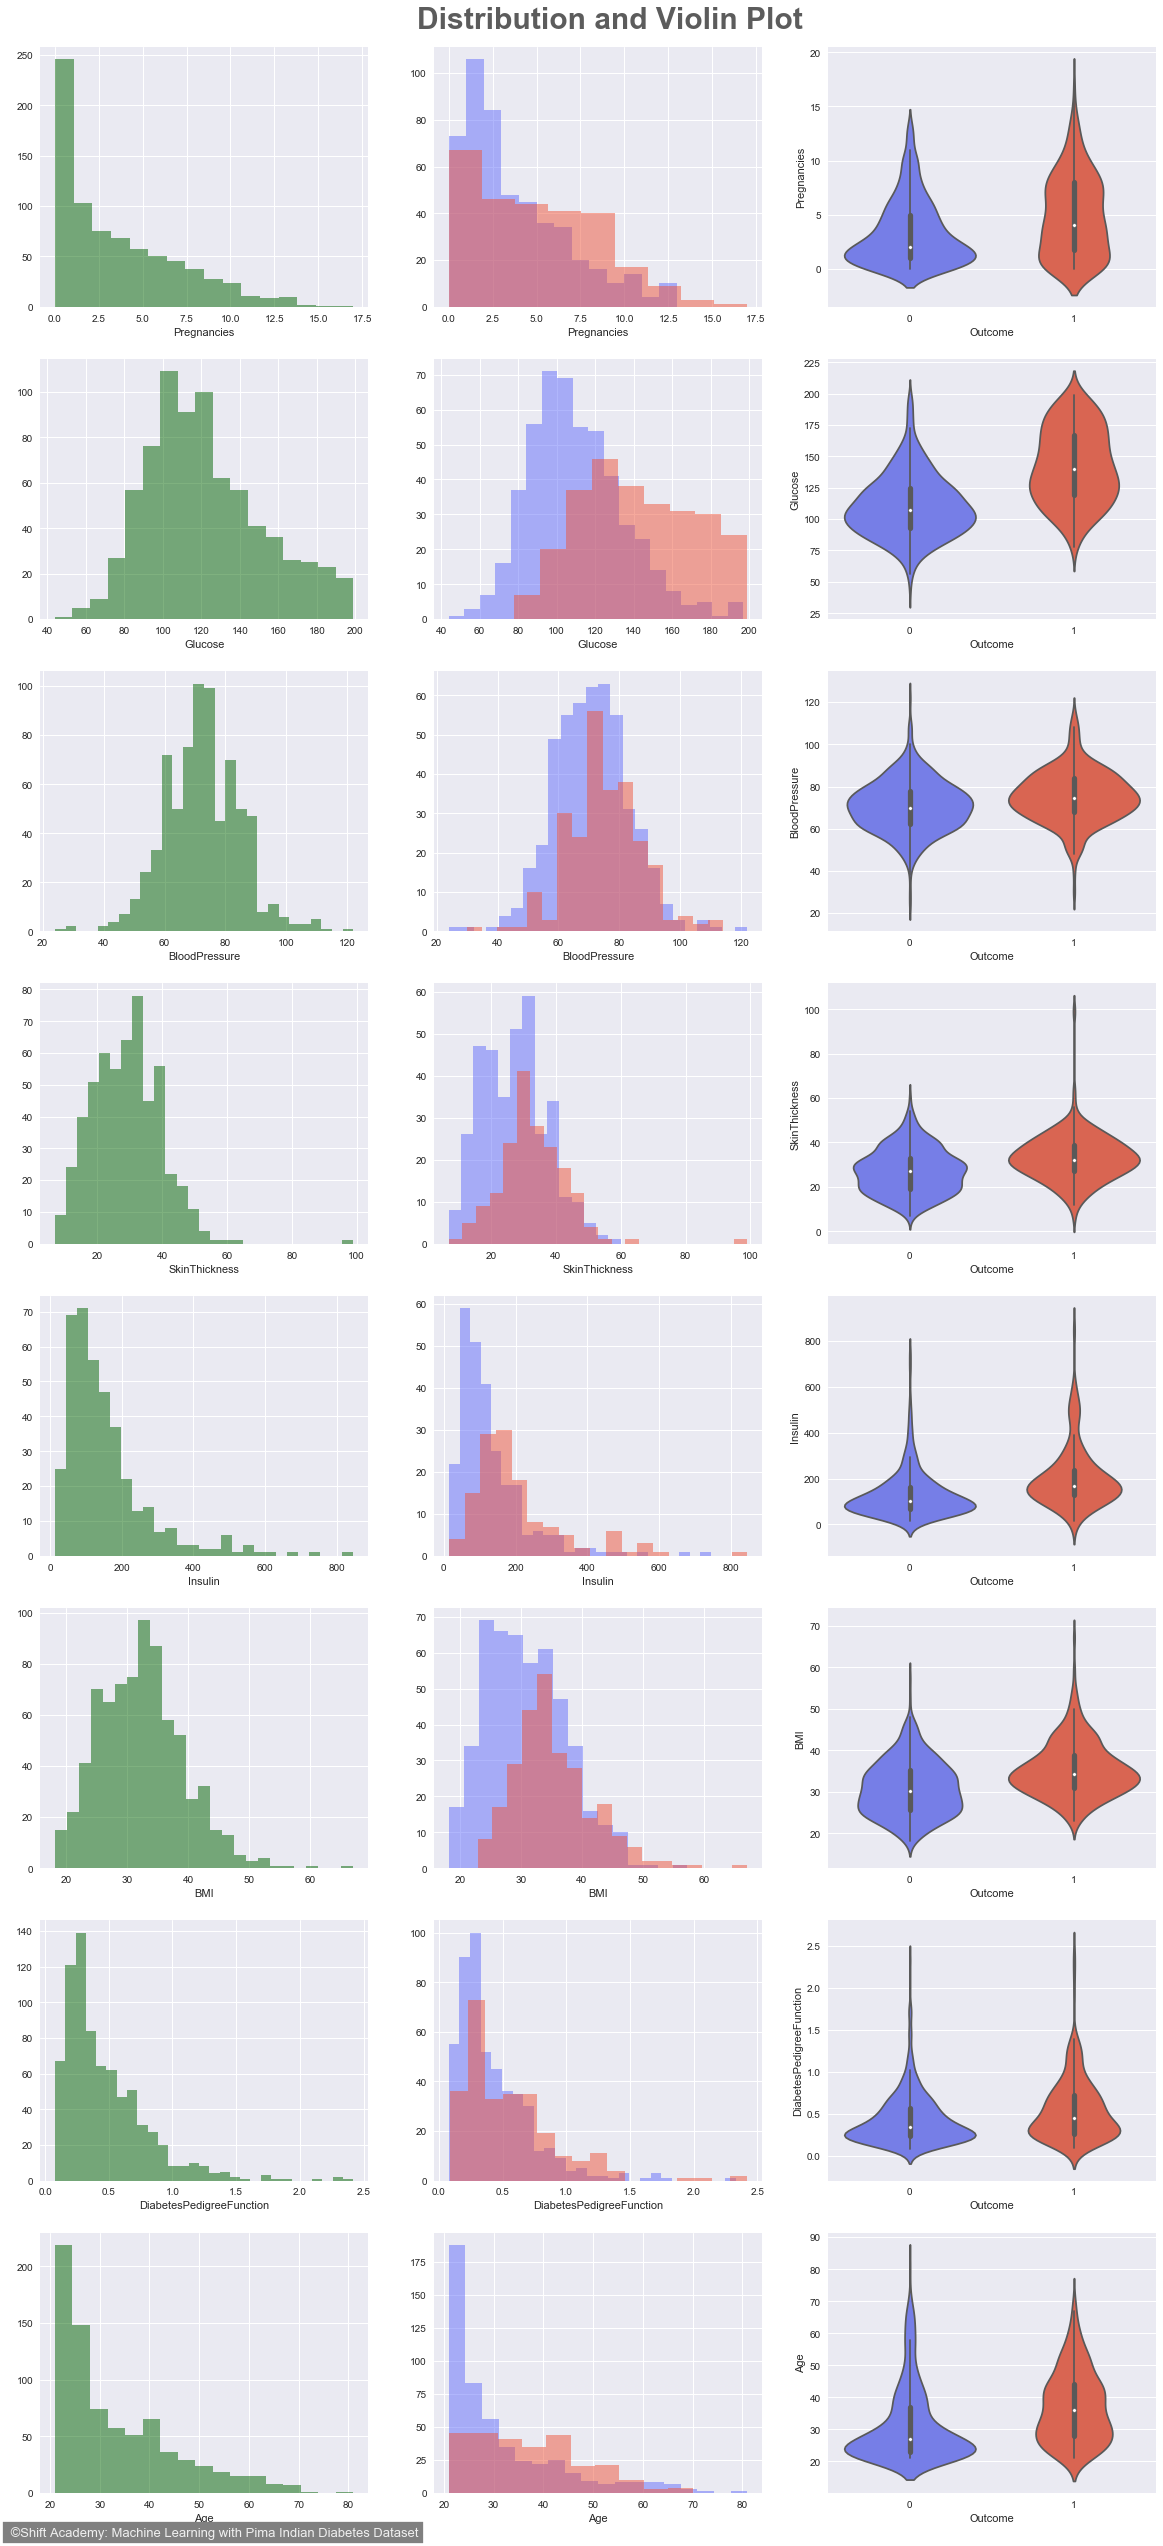

In [53]:
plt.style.use('seaborn')
color1 = '#636EFA'
color2 = '#EF553B'
fig, ax2 = plt.subplots(8, 3, figsize=(20, 45))

#Plotting distribution
for i in enumerate(df.columns[0:-1]):
    sns.distplot(df[i[1]],ax=ax2[i[0]][0], kde=False, color='darkgreen', \
                 hist_kws={"linewidth": 1, "alpha": 0.5})
#Plotting distribution with hue
for j in enumerate(df.columns[0:-1]):
    sns.distplot(df[df.Outcome==0][j[1]],ax=ax2[j[0]][1], kde=False, color=[color1], \
             hist_kws={"linewidth": 1, "alpha": 0.5})
    sns.distplot(df[df.Outcome==1][j[1]],ax=ax2[j[0]][1], kde=False, color=[color2], \
             hist_kws={"linewidth": 1, "alpha": 0.5})
#Plotting violin plot
for k in enumerate(df.columns[0:-1]):
    sns.violinplot(x='Outcome', y=k[1], data=df, ax = ax2[k[0]][2], palette=[color1, color2])
    
#Decorating    
plt.text(x = -3.0, y = 780, s = "Distribution and Violin Plot",
               fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -5.5, y = -3.3,
    s = ' ©Shift Academy: Machine Learning with Pima Indian Diabetes Dataset',fontsize = 13, 
               color = '#f0f0f0', backgroundcolor = 'grey')

plt.show()

- We can see from the violin plot that the patient with higher value of Pregnancy Months, Glucose, BMI and insulin tend to have higher risk of diabetes. The violin shape between diabetes and non diabetes patient are quite different, showing the distribution for diabetic and non diabetic patients are different either.

- For variable DiabetesPedigreeFunction, BloodPressure and SkinThickness there are very slight association between diabetic and non diabetic patients. This is shown by the relatively same violin shape between diabetes patient and non-diabetes patient, except the violin plots for diabetes patient show some high value outliers.

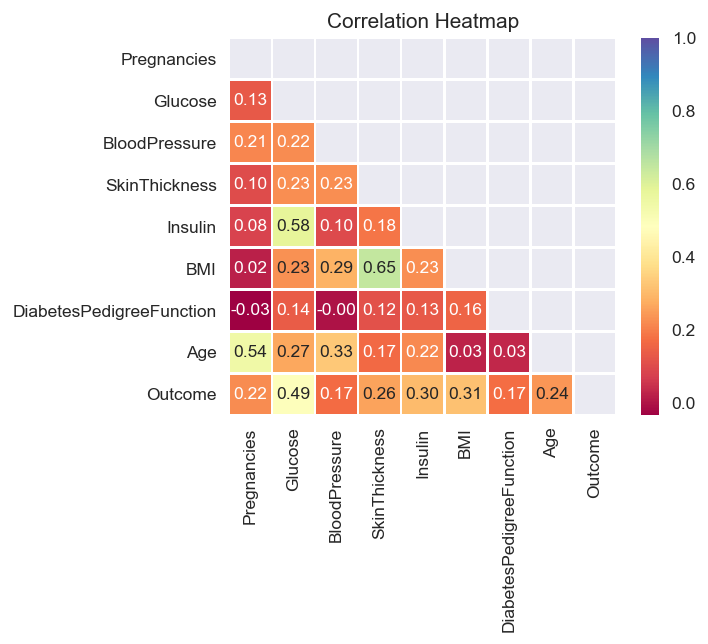

In [54]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),
             mask = mask,
            fmt = ".2f",
            annot=True,
            lw=1,
            cmap = 'Spectral')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')

plt.show()

From above we can see that no feature has high correlation value:

- Glucose, Blood Pressure, BMI, and Outcome shows positive weak linear association with other variable in given dataset. 
- Skin Thickness and Insulin have positive weak correlations with other variables, except Pregnancies, and Age
- DiabetesPedigreeFunction has positive weak correlations with other variables, except Pregnancies
- Age has positive weak correlations with other variables, except Skin Thickness and Insulin
- Pregnancies  has positive weak correlations with other variables, except Skin Thickness, Insulin and DiabetePedigreeFunction

From Pearson's correlation plot, we can see each how features correlate with each other. But this doesn't explain features causality to the outcome value. So we will explore each feature importance.

## 1.2 Feature Importance

The features that will be used for model training selected from the feature importance.

In [55]:
#Replace null value with mean values:
df[zerofields] = df[zerofields].fillna(df.median())

### 1.2.1 Feature Importance with Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=df[df.columns[:8]]
y=df['Outcome']
model.fit(X,y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.249331
BMI                         0.166815
Age                         0.135633
DiabetesPedigreeFunction    0.119163
Insulin                     0.090001
BloodPressure               0.083226
Pregnancies                 0.080731
SkinThickness               0.075100
dtype: float64

### 1.2.2 Feature Importance with Shap

We will split the dataset temporarily to review the feature values from shap. SHAP stands for SHapley Additive exPlanation. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we’d make if that feature took some baseline value.

In [57]:
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

tree_model = DecisionTreeClassifier().fit(X_train, y_train)

We will select a single row from dataset to show how each feature impacts the prediction value.

In [58]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(3)

row_to_show = randint(0, 100)

data_for_prediction = X_test.iloc[row_to_show] 

In [59]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Note: to show the following SHAP plot, you shoud run it

In [60]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue

- The base_value here is 0.3485 while our predicted value is 1.
- Glucose = 138 has the biggest impact on increasing the prediction, and DiabetesPedigreeFunction = 0.933 has the lowest impact on increasing the prediction value.
- Age = 25 feature has the biggest effect in decreasing the prediction, and Pregnancies = 0 has the lowest impact in decreasing the prediction value.

The base_value comes from the mean of y_train mean that construct the tree_model before:

In [61]:
y_train.mean()

0.3485342019543974

#### [Shap Summary Plot]

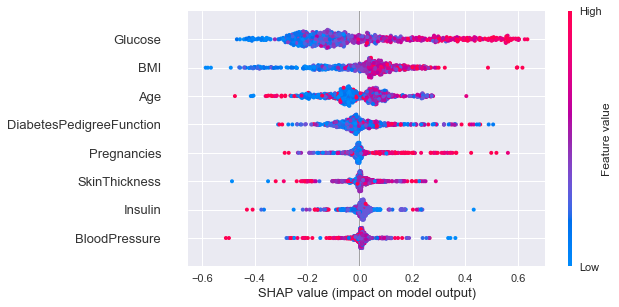

In [62]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(tree_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1],X)

Based on the shap summary plot above, we can see that;
- The order of feature vertically represents the important features. The most to least important features are: Glucose, BMI, Age, DiabetesPedigreeFunction, Pregnancies, SkinThickness, Insulin and BloodPressure. The first four most important features match with the previous RandomForest feature importance result.
- The color represents whether each feature is high or low for the dataset.
- Horizontal location shows whether the effect of that value caused a higher or lower prediction. For instance, the higher value of Glucose tend to affect the higher prediction (in this case higher risk to diabetes)

*ref: https://www.kaggle.com/parulpandey/intrepreting-machine-learning-models*

We also can show the impact from each feature with a horizontal bar graph:

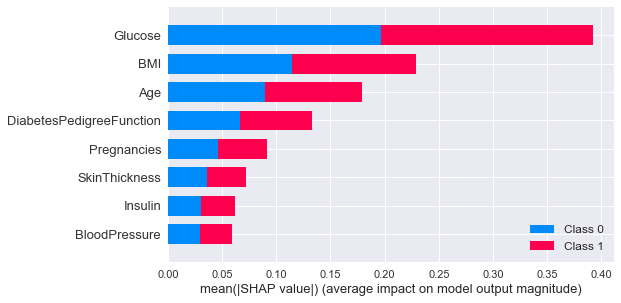

In [63]:
shap_values = shap.TreeExplainer(tree_model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

## 2. Splitting Feature and Label

From feature importance, we will just use Glucose, BMI, Age and DiabetesPedigreeFunction features with importance >= 0.1 from RandomForest feature importance. This first four features also matched with SHAP summary plot result. 

In [64]:
X = df[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']]
y = df['Outcome']

### 2.1 Scaling Dataset

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. Examples of such algorithm families include:
- linear and logistic regression
- nearest neighbors
- neural networks
- support vector machines with radial bias kernel functions
- principal components analysis
- linear discriminant analysis

Outliers are extreme values existing in the dataset. **It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc)** is applied on the dataset. **Outliers do not affect a tree-based algorithm**. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

reference: <br>
https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe <br>
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In this case we will use StandardScaler and MinMax Scaler

#### [Standard Scaler]

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance (dividing all by standard deviation). StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [65]:
#Standard Scaler
scaler1 = StandardScaler()

X_scaled1 = scaler1.fit_transform(X)
X_scaled1 = pd.DataFrame(X_scaled1)
X_scaled1.columns = X.columns

X_scaled1.describe()

,Glucose,BMI,Age,DiabetesPedigreeFunction
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,7.661695e-18,2.815312e-16,1.857600e-16,2.398978e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-2.552931e+00,-2.074783e+00,-1.041549e+00,-1.189553e+00
25%,-7.201630e-01,-7.212087e-01,-7.862862e-01,-6.889685e-01
50%,-1.530732e-01,-2.258989e-02,-3.608474e-01,-3.001282e-01
75%,6.112653e-01,6.032562e-01,6.602056e-01,4.662269e-01
max,2.542658e+00,5.042397e+00,4.063716e+00,5.883565e+00


#### [MinMax Scaler]

MinMaxScaler subtracts the minimum value in the feature and then divides by the range. It preserves the shape of the original distribution and doesn’t reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

In [66]:
#MinMax Scaler
scaler2 = MinMaxScaler()

X_scaled2 = scaler2.fit_transform(X)
X_scaled2 = pd.DataFrame(X_scaled2)
X_scaled2.columns = X.columns

X_scaled2.describe()

,Glucose,BMI,Age,DiabetesPedigreeFunction
count,768.000000,768.000000,768.000000,768.000000
mean,0.501008,0.291518,0.204015,0.168179
std,0.196376,0.140597,0.196004,0.141473
min,0.000000,0.000000,0.000000,0.000000
25%,0.359677,0.190184,0.050000,0.070773
50%,0.470968,0.288344,0.133333,0.125747
75%,0.620968,0.376278,0.333333,0.234095
max,1.000000,1.000000,1.000000,1.000000


## 3. Splitting test and train data

There will be 3 data train and test that will be used to build the model:
- Train and test data that unscaled
- Train and test data that scaled by StandardScaler
- Train and test data that scaled by MinMaxScaler

In [67]:
#For unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

#For data with StandardScaler
X_train_sc1, X_test_sc1, y_train_sc1, y_test_sc1 = train_test_split(X_scaled1, y, test_size=0.2, random_state=123, stratify=y)

#For data with MinmaxScaler
X_train_sc2, X_test_sc2, y_train_sc2, y_test_sc2 = train_test_split(X_scaled2, y, test_size=0.2, random_state=123, stratify=y)

In [68]:
X_train.mean()

Glucose                     122.009772
BMI                          32.556352
Age                          33.309446
DiabetesPedigreeFunction      0.477922
dtype: float64

### Imbalance Data

In [69]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [70]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

From the splitted data it can be seen that the non-diabetic data (Outcome=0) outnumber the diabetic data (Outcome=1). Feeding imbalanced data to our classifier can make it biased in favor of the majority class, simply because it did not have enough data to learn about the minority.

For dealing with this problem, we can apply SMOTE (Synthetic Minority Over-Sampling Technique). SMOTE applied only for the training data, and doesn't create duplicate values. SMOTE works by creating synthetic data from artificial points between minority class data points. This is done until the data is balanced (in this case, the outcome positive and negative diabetes in training data set is equal).

Another option beside SMOTE, we can treat imbalance data with Undersampling and Oversampling method.

In [71]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)
X_train_sc1, y_train_sc1 = smt.fit_sample(X_train_sc1, y_train_sc1)
X_train_sc2, y_train_sc2 = smt.fit_sample(X_train_sc2, y_train_sc2)

In [72]:
y_train.value_counts()

1    400
0    400
Name: Outcome, dtype: int64

The train data is already have the balance proportion for the outcome.

## 4. Defining Model

### 4.1 Models

There are 9 models that we will try to model <br>
**1. Tree based model:**
- Decision Tree
- Random Forest
- Adaboost
- Gradient Boost
- Light GBM

**2. Non-tree based model:**
- KNN
- Gaussian Naive-Bayes
- Support Vector Machine

In [73]:
models = ['KNN',
         'Decision Tree',
         'Random Forest',
         'Logistic Regression',
         'AdaBoost',
         'Gradient Boost',
         'Gaussian Naive Bayes',
         'Support Vector Machine',
         'Light GBM'
         ]

In [74]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
logreg = LogisticRegression()
adaboost = AdaBoostClassifier()
gradboost = GradientBoostingClassifier()
gauss_nb = GaussianNB()
svc = SVC()
lgb = LGBMClassifier()

model_tune = [knn, dtc, rf, logreg, adaboost, gradboost, gauss_nb, svc, lgb]

Since we will run multiple models with multiple data and methods, we could define some function that we will use several times.

In [122]:
#Function to train, validate and save model performace in a list
def run_model1(model, X_train, X_test, y_train, y_test, model_perform):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
#    y_pred_proba = model.predict_proba(X_test)
    
    #Saving model performance
    model_perform[0].append(accuracy_score(y_test,y_pred))
    model_perform[1].append(recall_score(y_test,y_pred))
    model_perform[2].append(roc_auc_score(y_test, y_pred))
    model_perform[3].append(f1_score(y_test, y_pred))
   

In [123]:
#Function to save model performace into list
def append_model(y_test, y_pred, model_perform):
    #Saving model performance
    model_perform[0].append(accuracy_score(y_test,y_pred))
    model_perform[1].append(recall_score(y_test,y_pred))
    model_perform[2].append(roc_auc_score(y_test, y_pred))    
    model_perform[3].append(f1_score(y_test,y_pred))


For each model performance, since we are currently dealing with imbalanced data,  we will choose the best model based on the **ROC AUC Score**. The ROC AUC score will be compared to F1 Score result to ensure that the models perform optimally. F1 Score is the harmonic mean between Precision Score and Recall Score. After running each model and storing each model performance, we will print the model evaluation result according to the highest ROC AUC Score.

In [124]:
def print_model_perf(model_name, model_perform):
    modelprint = pd.DataFrame(model_name)
    accu_print = pd.DataFrame(model_perform[0])
    recall_print = pd.DataFrame(model_perform[1])
    rocauc_print = pd.DataFrame(model_perform[2])
    f1_print = pd.DataFrame(model_perform[3])

    compare = modelprint.merge(accu_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(recall_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(rocauc_print, how='outer', left_index=True, right_index=True)
    compare = compare.merge(f1_print, how='outer', left_index=True, right_index=True)
    compare.columns= ['Model', 'Accuracy','Recall', 'ROC AUC Score', 'F1 Score']
    
        
    #Sorting based on the highest ROC AUC score
    compare = compare.sort_values(['ROC AUC Score'], ascending=False)
    return compare

### 4.2 Model without Hyperparameter Tuning

#### 4.2.a For unscaled data

In [117]:
#For unscaled data
accu_bt = []
recall_bt = []
rocauc_bt = []
f1score_bt = []
model_perform_bt = [accu_bt, recall_bt, rocauc_bt, f1score_bt]

In [118]:
for i in model_tune:
    run_model1(i,  X_train, X_test, y_train, y_test, model_perform_bt)

In [121]:
print_model_perf(models, model_perform_bt)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
5,Gradient Boost,0.818182,0.833333,0.821667,0.762712
2,Random Forest,0.792208,0.796296,0.793148,0.728814
6,Gaussian Naive Bayes,0.818182,0.703704,0.791852,0.730769
8,Light GBM,0.792208,0.759259,0.784630,0.719298
4,AdaBoost,0.772727,0.759259,0.769630,0.700855
1,Decision Tree,0.779221,0.685185,0.757593,0.685185
3,Logistic Regression,0.785714,0.648148,0.754074,0.679612
7,Support Vector Machine,0.766234,0.648148,0.739074,0.660377
0,KNN,0.655844,0.666667,0.658333,0.576000


#### 4.2.b For scaled data

##### Training model only with train data

##### [Using Standard Scaler]

In [125]:
#For data scaled with MinmaxScaler
accu_bt_sc1 = []
recall_bt_sc1 = []
rocauc_bt_sc1 = []
f1score_bt_sc1 = []
model_perform_sc1 = [accu_bt_sc1, recall_bt_sc1, rocauc_bt_sc1, f1score_bt_sc1]

In [126]:
for i in model_tune:
    run_model1(i, X_train_sc1, X_test_sc1, y_train_sc1, y_test_sc1, model_perform_sc1)

In [127]:
print_model_perf(models, model_perform_sc1)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
7,Support Vector Machine,0.831169,0.851852,0.835926,0.779661
4,AdaBoost,0.805195,0.814815,0.807407,0.745763
5,Gradient Boost,0.805195,0.796296,0.803148,0.741379
8,Light GBM,0.798701,0.759259,0.789630,0.725664
2,Random Forest,0.779221,0.777778,0.778889,0.711864
6,Gaussian Naive Bayes,0.798701,0.666667,0.768333,0.699029
0,KNN,0.753247,0.740741,0.750370,0.677966
3,Logistic Regression,0.766234,0.629630,0.734815,0.653846
1,Decision Tree,0.727273,0.574074,0.692037,0.596154


##### [Using MinMax Scaler]

In [128]:
#For data scaled with MinmaxScaler
accu_bt_sc2 = []
recall_bt_sc2 = []
rocauc_bt_sc2 = []
f1score_bt_sc2 = []
model_perform_sc2 = [accu_bt_sc2, recall_bt_sc2, rocauc_bt_sc2, f1score_bt_sc2]

In [129]:
for i in model_tune:
    run_model1(i, X_train_sc2, X_test_sc2, y_train_sc2, y_test_sc2, model_perform_sc2)

In [130]:
print_model_perf(models, model_perform_sc2)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
7,Support Vector Machine,0.857143,0.851852,0.855926,0.807018
5,Gradient Boost,0.798701,0.833333,0.806667,0.743802
2,Random Forest,0.785714,0.759259,0.779630,0.713043
6,Gaussian Naive Bayes,0.798701,0.666667,0.768333,0.699029
8,Light GBM,0.772727,0.740741,0.765370,0.695652
4,AdaBoost,0.759740,0.759259,0.759630,0.689076
3,Logistic Regression,0.785714,0.648148,0.754074,0.679612
0,KNN,0.746753,0.759259,0.749630,0.677686
1,Decision Tree,0.740260,0.611111,0.710556,0.622642


**Effect before and after scaling**
- Overall, all the models  with scaled data have better performance than the models with unscaled data. Both for Standard scaled data and MinMax scaled data.
- Model with Minmax scaled data give better performance than the model with Standard scaler. From both scaled data, the best best model result comes from Support Vector Machine.

### 4.3 Model Training with Grid Search Hyperparameter Tuning

In [132]:
def run_model2(model, X_train, X_test, y_train, y_test, model_perform, model_name):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    
    #Print Best Parameters and best score
    print('Hyperparameter result for ' + model_name[i[0]]+ ' model:\n')
    print('Best Parameter: '+ str(model.best_params_))
    print('Best Score :' + str(model.best_score_))
    print('\n')
    
    #Saving model performance
    model_perform[0].append(accuracy_score(y_test,y_pred))
    model_perform[1].append(recall_score(y_test,y_pred))
    model_perform[2].append(roc_auc_score(y_test, y_pred))
    model_perform[3].append(f1_score(y_test,y_pred))

### 3.3.a Hyperparameter Tuning

### [KNN]

KNN classifier is a supervised learning based on the nearest neighbor. The classification works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). KNN becomes slower as the data volume increases.

For optimizing KNN, we have to choose the right value of K:
- lower value of K results in higher influence of noise, the predictions become less stable, and can be affected by outliers
- higher value of K might result into overfitting.
- choose K as odd number to avoid tied condition.

*reference: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761*

In [133]:
#Parameter(s) that will be tuned
neighbor = np.arange(1,20,1)
hyperparameter1 = dict(n_neighbors=neighbor)

In [134]:
model1 = GridSearchCV(KNeighborsClassifier(), hyperparameter1, cv=10)

### [Decision Tree]

Decision tree classifies the examples by sorting them down the tree from the root to some leaf/terminal node. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes. It selects the attribute which has the smallest entropy, the smallers gini impurity, or the largest Information Gain.

Decision trees is very prone to overfitting. To prevent we should choose several variables that can act as pruning (eg. maximum depth) or random forest.

*reference: https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html*

#### Hyperparameter Tuning

In [161]:
criterion = ['gini','entropy']
maxdepth = np.arange(3,6,1)
min_samples_split = np.arange(1,5,1)
min_samples_leaf = np.arange(1,10,1)

hyperparameter2 = dict(criterion=criterion, max_depth=maxdepth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf)

In [136]:
model2 = GridSearchCV(DecisionTreeClassifier(), hyperparameter2, cv=10)

### [Random Forest Classifier]

Random forest classifier is an ensemble learning that creates a set of decision trees from **randomly selected subset of training set (boosting)** . It then **aggregates the votes from different decision trees** to decide the final class of the test object. The aggregate of many decision trees reduce the effect of noise giving more accurate results. Also, it uses the different features to make decisions **(random feature selection)**. This forces even more variation amongst the trees in the model and ultimately results in **low correlation across trees and more diversification**.

*reference: https://www.kdnuggets.com/2020/01/random-forest-powerful-ensemble-learning-algorithm.html*

#### Hyperparameter Tuning

In [137]:
n_estimators=[100,200,300]
criterion=['gini']
max_depth=np.arange(1,6,1)
min_samples_split=np.arange(1,5,1)
min_samples_leaf=np.arange(1,10,1)

hyperparameter3 = dict(criterion=criterion, max_depth=max_depth,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf)

In [138]:
model3 = GridSearchCV(RandomForestClassifier(), hyperparameter3, cv=10)

### [Logistic Regression]

Logistic regression use **linear method** to model the probability of the default class. The predictions are transformed using the logistic function (**sigmoid function**) to return a probability value which can then be mapped to two or more discrete classes.

The sigmoid function maps any real value into another value between 0 and 1. In order to map this to a discrete class (true/false, cat/dog), we select a threshold value or tipping point above which we will classify values into class 1 and below which we classify values into class 2.

Logistic regression model uses **Cross Entropy/Log loss cost function**. The cost function for linear regression which is mean squared error can't be used in logistic regression because it will be a non-convex function of parameters (theta). Gradient descent will converge into global minimum only if the function is convex.

*reference:* <br>
*https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html* <br>
*https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc*


#### Hyperparameter Tuning

    Penalty: set to specify the norm used in the penalizationsed to specify the norm used in the penalization. l1 for lasso and l2 for ridge

    C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [162]:
C = np.logspace(0,4,20)
penalty = ['l1', 'l2']

hyperparameter4=dict(C=C, penalty=penalty)

In [157]:
model4= GridSearchCV(LogisticRegression(), hyperparameter4, cv=10)

### [AdaBoost Classifier]

Adaboost classifier combines the **weak learners** in the form of many decision **stumps** (decision tree with only one root and two nodes). Contrary with the random forest classifier that gives equal weight to all forest of trees, adaboost classifier gives **different say** for each stump. Also, **the order of stumps that made is important** because the error from a stump made affects how the later stump is made.

AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.

Steps of Adaboost:
- At first each observation is assigned with the same weight (wi = 1/n_observation).
- In the process of making stumps, each observation's weights would change. Data that predicts correctly will get more weights and vice versa.
- Train another tree, the observation with higher weights will be prioritized.
- This is done iteratively until the model converges.

*reference: https://chrisalbon.com/machine_learning/trees_and_forests/adaboost_classifier/#:~:text=Create%20Adaboost%20Classifier&text=base_estimator%20is%20the%20learning%20algorithm%20to%20use%20to%20train%20the%20weak%20models.&text=n_estimators%20is%20the%20number%20of,weights%20and%20defaults%20to%201%20.*

#### Hyperparameter Tuning

    n_estimators: the number of models to iteratively train.

    learning_rate: the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

In [141]:
learning_rate = [0.01, 0.02, 0.05, 0.1]
n_estimators = np.arange(150,300,50)

hyperparameter5=dict(learning_rate=learning_rate,
                     n_estimators=n_estimators)

In [142]:
model5= GridSearchCV(AdaBoostClassifier(), hyperparameter5, cv=10)

### [Gradient Boosting Classifier]

Gradient boosting is a generalization of Adaboost algorithm. The statistical framework cast boosting as a numerical optimization problem where the objective is to **minimize the loss of the model by adding weak learners using a gradient descent like procedure**.

Gradient boosting involves three elements:

1. A loss function to be optimized.<br>
Any loss function can be used ti optimize the model. 


2. A weak learner to make predictions.<br>
Like AdaBoost, the weak learners that used in gradient boost are decision stumps. Larger trees can be used generally with 4-to-8 levels. To **ensure that the learners remain weak**, it is common to constrain with a maximum number of layers, nodes, splits or leaf nodes.


3. An additive model to add weak learners to minimize the loss function.<br>
Trees are added one at a time, and existing trees in the model are not changed. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss.

#### Hyperparameter Tuning

Enhancement in gradient boosting:

**1. Tree Constraints** <br>
The more constrained tree creation is, the more trees you will need in the model, and the reverse, where less constrained individual trees, the fewer trees that will be required. Parameters that can be tuned are:
- Number of trees/N_estimators, generally adding more trees to the model can be very slow to overfit. The advice is to keep adding trees until no further improvement is observed.
- Tree depth, deeper trees are more complex trees and shorter trees are preferred. Generally, better results are seen with 4-8 levels.
- Number of nodes or number of leaves, it is not constrained to a symmetrical structure if other constraints are used.
- Number of observations per split imposes a minimum constraint on the amount of training data at a training node before a split can be considered
- Minimim improvement to loss is a constraint on the improvement of any split added to a tree.

**2. Weighted Updates**<br>
**learning_rate**<br>
learning rate shrinks the contribution of each tree by learning_rate. Meaning if learning is slowed down, in turn require more trees to be added to the model, in turn taking longer to train, providing a configuration trade-off between the number of trees and learning rate. A high learning rate results in overfitting. 

**3. Stochastic Gradient Boosting**<br>
Variants of stochastic boosting that can be used:
- Subsample rows before creating each tree.
- Subsample columns before creating each tree
- Subsample columns before considering each split.

**4. Penalized Gradient Boosting**<br>
The additional regularization term helps to smooth the final learnt weights to avoid over-fitting. Intuitively, the regularized objective will tend to select a model employing simple and predictive functions. The leaf weight values of the trees can be regularized using popular regularization functions, such as:
- L1 regularization of weights.
- L2 regularization of weights.


reference: <br>
https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab <br>
https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

In [143]:
learning_rate = [0.01,0.05,0.1]
n_estimators = np.arange(50,350,50)
max_depth = [4,5,6,7,8]

hyperparameter6 = dict(learning_rate=learning_rate,
                       n_estimators=n_estimators,
                       max_depth=max_depth
                      )

In [144]:
model6= GridSearchCV(GradientBoostingClassifier(), hyperparameter6, cv=10)

### [Gaussian Naive Bayes]

- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. It it assumes that **features follow a normal distribution**.
- Gaussian Naive Bayes training is fast because only the probability of each class (P(A) known as prior probability) and the probability of each class given different input (x) values need to be calculated (P(A|B) known as posterior probability). No coefficients need to be fitted by optimization procedures.
- How to predict new value:
        MAP(y) = max(P(X|y) * P(y))
        
  Probabilities of new values are calculated using the Gaussian Probability Density Function (PDF).
        

*https://www.geeksforgeeks.org/naive-bayes-classifiers/#:~:text=Gaussian%20Naive%20Bayes%20classifier,is%20also%20called%20Normal%20distribution.*

#### Hyperparameter Tuning

The only parameter to fit in Gaussian Naive Bayes is **var_smoothing**. Variance smoothing can be considered to be a variant of Laplace smoothing in the sense that the var_smoothing parameter specifies the portion of the largest variance of all features to be added to variances for calculation stability.

The var_smoothing parameter's default value is  10−9 . We will conduct the grid search in the "logspace", that is, we will search over the powers of 10. We will start with  100  and end with  10−9 with 100 different values.

*https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/*

In [145]:
hyperparameter7 ={'var_smoothing': np.logspace(0,-9, num=100)}

In [146]:
model7=GridSearchCV(gauss_nb, hyperparameter7, cv=10)

### [Support Vector Machine]

Support Vector Machine works by finding out a line/ hyper-plane (in multidimensional space that separate outs classes). In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.


In [147]:
def rbfkernel():
    a = r'K(x,a) = -\exp(\frac{|x-a|^2}{2\sigma^2})'
    ax = plt.axes([0,0,0.5,0]) #left,bottom,width,height
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')
    plt.text(0.4,0,'$%s$' %a,size=14,color="black")
    plt.show()

#### Hyperparameter Tuning

**kernel** <br>
- linear kernel means that the hyperplane is linear. The equation for prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:

            f(x) = B(0) + sum(ai * (x,xi))
  B and ai is parameter that learned from training data.
  
  
- rbf kernel means that the hyperplane is not linear. Since the value of the RBF kernel decreases with distance and ranges between zero (in the limit) and one (when x = x'), it has a ready interpretation as a **similarity measure**.
            
            K(x,a) = exp(-|x-a|^2/(2*σ)) 


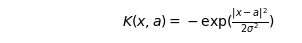

In [148]:
#Writing rbf kernel formula with latex format
rbfkernel()

**C**<br>
The regularization value
- For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. The classifier very intolerant to misclassified data points and thus the decision boundary becomes less biased and has more variance (when it's too high tend to overfit = low bias and high variance).
- Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points (when it's to low tend to underfit = high bias and low variance)

RegularizationType: Can be either "L2" or “L1”. Default is “L2”

**gamma**<br>
gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region.
- When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad (tend to underfit when it's too low).
- When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points (tend to overfit when it's very high)


more on: <br>
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72 <br>
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d <br>
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/

In [149]:
hyperparameter8 = {'kernel':['rbf','linear'],
                  'C':[0.01,0.05,0.1,0.5,1,2],
                  'gamma':[0.01,0.05,0.1,0.2,0.5,1]}

In [150]:
model8=GridSearchCV(SVC(), hyperparameter8, cv=10)

### [Light GBM]

Light GBM is a gradient boosting framework that uses tree based learning algorithm. **Light GBM produces much more complex trees by growing tree vertically** while other algorithm grows trees horizontally. Meaning that Light GBM grows tree **leaf-wise** while other algorithm grows level-wise. **It will choose the leaf with max delta loss to grow**. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

Light GBM can handle the large size of data and takes lower memory to run. It focuses on accuracy of results. Light GBM is sensitive to overfitting and can easily overfit small data.

ref: <br>
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc <br>
https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d <br>

#### Hyperparameter Tuning

**Control Parameters**
- max_depth: It describes the maximum depth of tree. This parameter is used to handle model overfitting. Any time you feel that your model is overfitted, my first advice will be to lower max_depth.
- min_data_in_leaf: It is the minimum number of the records a leaf may have. The default value is 20, optimum value. It is also used to deal over fitting
- feature_fraction: Used when your boosting(discussed later) is random forest. 0.8 feature fraction means LightGBM will select 80% of parameters randomly in each iteration for building trees.
- bagging_fraction: specifies the fraction of data to be used for each iteration and is generally used to speed up the training and avoid overfitting.
- early_stopping_round: This parameter can help you speed up your analysis. Model will stop training if one metric of one validation data doesn’t improve in last early_stopping_round rounds. This will reduce excessive iterations.
- lambda: lambda specifies regularization. Typical value ranges from 0 to 1.
- min_gain_to_split: This parameter will describe the minimum gain to make a split. It can used to control number of useful splits in tree.
- max_cat_group: When the number of category is large, finding the split point on it is easily over-fitting. So LightGBM merges them into ‘max_cat_group’ groups, and finds the split points on the group boundaries, default:64

**Core Parameters**
- Task: It specifies the task you want to perform on data. It may be either train or predict.
- application: This is the most important parameter and specifies the application of your model, whether it is a regression problem or classification problem. LightGBM will by default consider model as a regression model.
- boosting: defines the type of algorithm you want to run, default=gdbt
gbdt: traditional Gradient Boosting Decision Tree <br>
rf: random forest <br>
dart: Dropouts meet Multiple Additive Regression Trees <br>
goss: Gradient-based One-Side Sampling <br>
- num_boost_round: Number of boosting iterations, typically 100+
- learning_rate: This determines the impact of each tree on the final outcome. GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates. Typical values: 0.1, 0.001, 0.003…
- num_leaves: number of leaves in full tree, default: 31
- device: default: cpu, can also pass gpu

**More tips in running Light GBM:**
***For Faster Speed:***
- Use bagging by setting bagging_fraction and bagging_freq
- Use feature sub-sampling by setting feature_fraction
- Use small max_bin
- Use save_binary to speed up data loading in future learning
- Use parallel learning, refer to parallel learning guide.

***For better accuracy:***
- Use large max_bin (may be slower)
- Use small learning_rate with large num_iterations
- Use large num_leaves(may cause over-fitting)
- Use bigger training data
- Try dart
- Try to use categorical feature directly

***To deal with over-fitting:***
- Use small max_bin
- Use small num_leaves
- Use min_data_in_leaf and min_sum_hessian_in_leaf
- Use bagging by set bagging_fraction and bagging_freq
- Use feature sub-sampling by set feature_fraction
- Use bigger training data
- Try lambda_l1, lambda_l2 and min_gain_to_split to regularization
- Try max_depth to avoid growing deep tree

In [151]:
hyperparameter9 = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2],
                 'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000],
                 'num_leaves': sp_randint(6, 50),
                 'min_child_samples': sp_randint(100, 500), 
                 'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                 'subsample': sp_uniform(loc=0.2, scale=0.8),
                 'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
                 'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [152]:
model9 = RandomizedSearchCV(lgb, hyperparameter9, cv=10)

In [153]:
#Compile all model into a single list
model_opt = [model1,
            model2,
            model3,
            model4,
            model5,
            model6,
            model7,
            model8,
            model9
            ]

### 3.3.b Model Training and Validation

For grid search model training, we will try 2 different method.
- First training model with the whole data and validate it with test data.
- Second, training model with only train data and validate it with test data.

This two method will be done over Standard scaled data and Minmax scaled data

##### [Model training for the whole features, using Standard Scaled data]

In [154]:
#For data scaled with StandardScaler, data train: the whole X
accu_gs1 = []
recall_gs1 = []
rocauc_gs1 = []
f1score_gs1 = []
gs_score1 = []
model_perform_gs1 = [accu_gs1, recall_gs1, rocauc_gs1, f1score_gs1]

In [155]:
for i in enumerate(model_opt):
    run_model2(i[1], X_scaled1, X_test_sc1, y, y_test_sc1, model_perform_gs1, models)

Hyperparameter result for KNN model:

Best Parameter: {'n_neighbors': 19}
Best Score :0.7838858509911142


Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 3}
Best Score :0.7500170881749829


Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best Score :0.7721291866028708


Hyperparameter result for Logistic Regression model:

Best Parameter: {'C': 1.0, 'penalty': 'l2'}
Best Score :0.7695146958304854


Hyperparameter result for AdaBoost model:

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 250}
Best Score :0.7747607655502392


Hyperparameter result for Gradient Boost model:

Best Parameter: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}
Best Score :0.7578092959671907


Hyperparameter result for Gaussian Naive Bayes model:

Best Parameter: {'var_smoothing': 0.003511191

In [158]:
print_model_perf(models, model_perform_gs1)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
5,Gradient Boost,0.948052,0.888889,0.934444,0.923077
2,Random Forest,0.870130,0.796296,0.853148,0.811321
0,KNN,0.876623,0.740741,0.845370,0.808081
1,Decision Tree,0.837662,0.796296,0.828148,0.774775
4,AdaBoost,0.831169,0.666667,0.793333,0.734694
8,Light GBM,0.824675,0.685185,0.792593,0.732673
7,Support Vector Machine,0.831169,0.629630,0.784815,0.723404
6,Gaussian Naive Bayes,0.798701,0.574074,0.747037,0.666667
3,Logistic Regression,0.779221,0.537037,0.723519,0.630435


##### [Model training for the whole features, using MinMax Scaled data]

In [159]:
#For data scaled with MinMaxScaler, data train: the whole X
accu_gs2 = []
recall_gs2 = []
rocauc_gs2 = []
f1score_gs2 = []
gs_score2 = []
model_perform_gs2 = [accu_gs2, recall_gs2, rocauc_gs2, f1score_gs2]

In [160]:
for i in enumerate(model_opt):
    run_model2(i[1], X_scaled2, X_test_sc2, y, y_test_sc2, model_perform_gs2, models)

Hyperparameter result for KNN model:

Best Parameter: {'n_neighbors': 19}
Best Score :0.7760594668489406


Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best Score :0.7500170881749829


Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 4}
Best Score :0.7708475734791524


Hyperparameter result for Logistic Regression model:

Best Parameter: {'C': 1.6237767391887217, 'penalty': 'l2'}
Best Score :0.7721462747778537


Hyperparameter result for AdaBoost model:

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 250}
Best Score :0.7747607655502392


Hyperparameter result for Gradient Boost model:

Best Parameter: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
Best Score :0.7603554340396446


Hyperparameter result for Gaussian Naive Bayes model:

Best Parameter: {'var_smoothin

In [163]:
print_model_perf(models, model_perform_gs2)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
5,Gradient Boost,0.922078,0.870370,0.910185,0.886792
1,Decision Tree,0.837662,0.796296,0.828148,0.774775
0,KNN,0.844156,0.685185,0.807593,0.755102
2,Random Forest,0.837662,0.685185,0.802593,0.747475
4,AdaBoost,0.831169,0.666667,0.793333,0.734694
6,Gaussian Naive Bayes,0.798701,0.574074,0.747037,0.666667
7,Support Vector Machine,0.772727,0.518519,0.714259,0.615385
3,Logistic Regression,0.766234,0.481481,0.700741,0.590909
8,Light GBM,0.772727,0.444444,0.697222,0.578313


##### [Model training with only train data, using Standard Scaled data]

In [164]:
#For data scaled with StandardScaler, data train: only train data
accu_gs3 = []
recall_gs3 = []
rocauc_gs3 = []
f1score_gs3 = []
gs_score3 = []
model_perform_gs3 = [accu_gs3, recall_gs3, rocauc_gs3, f1score_gs3]

In [165]:
for i in enumerate(model_opt):
    run_model2(i[1], X_train_sc1, X_test_sc1, y_train_sc1, y_test_sc1, model_perform_gs3, models)

Hyperparameter result for KNN model:

Best Parameter: {'n_neighbors': 1}
Best Score :0.805


Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.7587499999999999


Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.7825


Hyperparameter result for Logistic Regression model:

Best Parameter: {'C': 1.0, 'penalty': 'l2'}
Best Score :0.7375


Hyperparameter result for AdaBoost model:

Best Parameter: {'learning_rate': 0.05, 'n_estimators': 250}
Best Score :0.7737499999999999


Hyperparameter result for Gradient Boost model:

Best Parameter: {'learning_rate': 1, 'max_depth': 7, 'n_estimators': 200}
Best Score :0.7975


Hyperparameter result for Gaussian Naive Bayes model:

Best Parameter: {'var_smoothing': 0.1873817422860384}
Best Score :0.7375


Hyperparameter result for

In [166]:
print_model_perf(models, model_perform_gs3)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
2,Random Forest,0.792208,0.833333,0.801667,0.737705
4,AdaBoost,0.785714,0.833333,0.796667,0.731707
7,Support Vector Machine,0.792208,0.777778,0.788889,0.724138
5,Gradient Boost,0.779221,0.740741,0.770370,0.701754
6,Gaussian Naive Bayes,0.798701,0.666667,0.768333,0.699029
8,Light GBM,0.766234,0.740741,0.760370,0.689655
3,Logistic Regression,0.766234,0.629630,0.734815,0.653846
1,Decision Tree,0.733766,0.703704,0.726852,0.649573
0,KNN,0.707792,0.611111,0.685556,0.594595


##### [Model training with only training data, using MinMax Scaled data]

In [167]:
#For data scaled with MinmaxScaler, data train: only train data
accu_gs4 = []
recall_gs4 = []
rocauc_gs4 = []
f1score_gs4 = []
gs_score4 = []
model_perform_gs4 = [accu_gs4, recall_gs4, rocauc_gs4, f1score_gs4]

In [168]:
for i in enumerate(model_opt):
    run_model2(i[1], X_train_sc2, X_test_sc2, y_train_sc2, y_test_sc2, model_perform_gs4, models)

Hyperparameter result for KNN model:

Best Parameter: {'n_neighbors': 1}
Best Score :0.81125


Hyperparameter result for Decision Tree model:

Best Parameter: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 2}
Best Score :0.77


Hyperparameter result for Random Forest model:

Best Parameter: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score :0.79125


Hyperparameter result for Logistic Regression model:

Best Parameter: {'C': 1.0, 'penalty': 'l2'}
Best Score :0.74875


Hyperparameter result for AdaBoost model:

Best Parameter: {'learning_rate': 0.1, 'n_estimators': 150}
Best Score :0.7700000000000001


Hyperparameter result for Gradient Boost model:

Best Parameter: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best Score :0.795


Hyperparameter result for Gaussian Naive Bayes model:

Best Parameter: {'var_smoothing': 0.8111308307896871}
Best Score :0.7424999999999999


Hyperparameter result f

In [169]:
print_model_perf(models, model_perform_gs4)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
7,Support Vector Machine,0.831169,0.851852,0.835926,0.779661
2,Random Forest,0.792208,0.851852,0.805926,0.741935
1,Decision Tree,0.779221,0.833333,0.791667,0.725806
4,AdaBoost,0.779221,0.814815,0.787407,0.721311
6,Gaussian Naive Bayes,0.805195,0.666667,0.773333,0.705882
8,Light GBM,0.772727,0.759259,0.769630,0.700855
5,Gradient Boost,0.779221,0.722222,0.766111,0.696429
3,Logistic Regression,0.785714,0.648148,0.754074,0.679612
0,KNN,0.714286,0.592593,0.686296,0.592593


**GridSearch Result**
- There are 4 methods to train and validate the model above. <br>
Method 1: Training model with StandardScaler scaled data (X_scaled1, y) <br>
Method 2: Training model with MinmaxScaler scaled data (X_scaled2, y) <br>
Method 3: Training model with StandardScaler scaled training data (X_train_sc1, y_train_sc1) <br>
Method 4: Training model with MinmaxScaler scaled training data (X_train_sc2, y_train_sc2) <br>

The best model comes from method 1: <br>
Gradient Boosting model gives <br>
 - accuracy score 0.95 <br>
 - recall score 0.89 <br>
 - ROC Score 0.93 and  <br>
 - F1 score 0.92

In [170]:
print_model_perf(models, model_perform_gs1)

,Model,Accuracy,Recall,ROC AUC Score,F1 Score
5,Gradient Boost,0.948052,0.888889,0.934444,0.923077
2,Random Forest,0.870130,0.796296,0.853148,0.811321
0,KNN,0.876623,0.740741,0.845370,0.808081
1,Decision Tree,0.837662,0.796296,0.828148,0.774775
4,AdaBoost,0.831169,0.666667,0.793333,0.734694
8,Light GBM,0.824675,0.685185,0.792593,0.732673
7,Support Vector Machine,0.831169,0.629630,0.784815,0.723404
6,Gaussian Naive Bayes,0.798701,0.574074,0.747037,0.666667
3,Logistic Regression,0.779221,0.537037,0.723519,0.630435


### 3.10 Neural Network Classification

As Mas Abdul advice, we can give a try to neural network classifier.

In [25]:
# from keras.models import Sequential
# from keras.layers import Dense
import tensorflow
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam
from keras.callbacks import ModelCheckpoint

import tensorflow.keras as kr
from keras import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

#### 3.10a Without Hyperparameter Tuning

We will build an NN-classifier with following network:

- Input parameter: 4 (top important features)
- activation function for all hidden layer is relu. (Other non-linear option can be: tanh, sigmoid, softmax, Swish, etc) <br>
ReLU stands for Rectified Linear Unit and mathematically written as:
        
       y = max(0,x)
        
    But if the inputs approach zero, the network don't perform backpropagation and can not learn (dying ReLU). To prevent this, we also can use Leaky ReLU with following equation:

        y = max(0.1*x, x)

    The problem with leaky ReLU is the result not consistent for negative inputs.
    

- activation function for the output layer: sigmoid


In [50]:
#Creating model
classifier1 = Sequential()

#First Hidden Layer
classifier1.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4))

#Second  Hidden Layer
classifier1.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#Third  Hidden Layer
classifier1.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier1.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [51]:
#Compiling the neural network
classifier1.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

#### [For whole data with Standard Scaled]

In [52]:
#Fitting the data to the training dataset
classifier1.fit(X_scaled1, y, batch_size=10, epochs=100)

Epoch 1/100
768/768 [==============================] - 0s 199us/step - loss: 0.6882 - accuracy: 0.6419
Epoch 2/100
768/768 [==============================] - 0s 78us/step - loss: 0.6762 - accuracy: 0.6510
Epoch 3/100
768/768 [==============================] - 0s 77us/step - loss: 0.6588 - accuracy: 0.6510
Epoch 4/100
768/768 [==============================] - 0s 80us/step - loss: 0.6276 - accuracy: 0.6745
Epoch 5/100
768/768 [==============================] - 0s 75us/step - loss: 0.5793 - accuracy: 0.7630
Epoch 6/100
768/768 [==============================] - 0s 77us/step - loss: 0.5218 - accuracy: 0.7734
Epoch 7/100
768/768 [==============================] - 0s 75us/step - loss: 0.4888 - accuracy: 0.7747
Epoch 8/100
768/768 [==============================] - 0s 78us/step - loss: 0.4771 - accuracy: 0.7773
Epoch 9/100
768/768 [==============================] - 0s 75us/step - loss: 0.4733 - accuracy: 0.7721
Epoch 10/100
768/768 [==============================] - 0s 76us/step - loss: 0.47

Evaluate the loss value & metrics values for the model in test mode using evaluate function

In [53]:
eval_model1=classifier1.evaluate(X_train_sc1, y_train_sc1)
print('Loss: ', eval_model1[0])
print('Score: ', eval_model1[1])

800/800 [==============================] - 0s 33us/step
Loss:  0.4816347587108612
Score:  0.7649999856948853


Predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [54]:
y_pred =classifier1.predict(X_test_sc1)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [55]:
#Quick view to neural network classifier performance
print("Accuracy Score: ", accuracy_score(y_test_sc1, y_pred))
print("Recall Score: ", recall_score(y_test_sc1, y_pred))
print("F1 Score: ", f1_score(y_test_sc1, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test_sc1, y_pred))

Accuracy Score:  0.8051948051948052
Recall Score:  0.6666666666666666
F1 Score:  0.7058823529411765
ROC AUC Score:  0.7733333333333333


#### [For whole data with MinMax Scaled]

In [56]:
#Fitting the data to the training dataset
classifier1.fit(X_scaled2, y, batch_size=10, epochs=100)

Epoch 1/100
768/768 [==============================] - 0s 82us/step - loss: 0.6338 - accuracy: 0.6081
Epoch 2/100
768/768 [==============================] - 0s 77us/step - loss: 0.5855 - accuracy: 0.6523
Epoch 3/100
768/768 [==============================] - 0s 74us/step - loss: 0.5745 - accuracy: 0.6745
Epoch 4/100
768/768 [==============================] - 0s 77us/step - loss: 0.5665 - accuracy: 0.7083
Epoch 5/100
768/768 [==============================] - 0s 78us/step - loss: 0.5569 - accuracy: 0.6927
Epoch 6/100
768/768 [==============================] - 0s 76us/step - loss: 0.5442 - accuracy: 0.7292
Epoch 7/100
768/768 [==============================] - 0s 80us/step - loss: 0.5342 - accuracy: 0.7526
Epoch 8/100
768/768 [==============================] - 0s 81us/step - loss: 0.5248 - accuracy: 0.7526
Epoch 9/100
768/768 [==============================] - 0s 77us/step - loss: 0.5154 - accuracy: 0.7630
Epoch 10/100
768/768 [==============================] - 0s 77us/step - loss: 0.506

Evaluate the loss value & metrics values for the model in test mode using evaluate function

In [57]:
eval_model1=classifier1.evaluate(X_train_sc2, y_train_sc2)
print('Loss: ', eval_model1[0])
print('Score: ', eval_model1[1])

800/800 [==============================] - 0s 15us/step
Loss:  0.5332744550704956
Score:  0.7362499833106995


Predict the output for our test dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0

In [58]:
y_pred =classifier1.predict(X_test_sc2)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [59]:
#Quick view to neural network classifier performance
print("Accuracy Score: ", accuracy_score(y_test_sc2, y_pred))
print("Recall Score: ", recall_score(y_test_sc2, y_pred))
print("F1 Score: ", f1_score(y_test_sc2, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test_sc2, y_pred))

Accuracy Score:  0.7987012987012987
Recall Score:  0.5740740740740741
F1 Score:  0.6666666666666666
ROC AUC Score:  0.747037037037037


#### 3.10b Hyperparameter Tuning with GridSearchCV

The following neural network classifier with gridsearch parameter tuning is the adaptation from: <br> https://www.kaggle.com/bulentsiyah/pima-dataset-deep-learning-grid-search-84-4

The hyperparameter optimization will be done with 3 stages of grid search with following order:
1. Batch size and epochs
2. Learning rate and drop out rate
3. Kernel inilitialization and activation function
4. Node per hidden layer

##### [Batch size & epochs]

- Batch size is the quantity of data that will be used to train our model.
- Epochs is the iteration value.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam

In [33]:
# Define a random seed for KFold
seed = 6
np.random.seed(seed)

random_state in KFold: <br>

From sklearn website: When shuffle is True, random_state affects the ordering of the indices, which **controls the randomness of each fold for each class**. Otherwise, leave random_state as None. Pass an int for reproducible output across multiple function calls.

By applying random seed for KFold, the model that trained will be more stable. It can be illustrated as follows:

In [34]:
print(np.random.rand(4))
print(np.random.rand(4))
print(np.random.rand(4))

[0.89286015 0.33197981 0.82122912 0.04169663]
[0.10765668 0.59505206 0.52981736 0.41880743]
[0.33540785 0.62251943 0.43814143 0.73588211]


From above random number generated, all of the list are different to each other.

In [35]:
np.random.seed(0)
print(np.random.rand(4))

np.random.seed(2)
print(np.random.rand(4))

np.random.seed(2)
print(np.random.rand(4))

[0.5488135  0.71518937 0.60276338 0.54488318]
[0.4359949  0.02592623 0.54966248 0.43532239]
[0.4359949  0.02592623 0.54966248 0.43532239]


From above code we can see that the output from random number when we apply the same random.seed first always the same.

In [36]:
# Start defining the model
def model_nn():
    # create model
    model = Sequential()
    #First hidden layer
    model.add(Dense(8, input_dim = 4, kernel_initializer='normal', activation='relu'))
    
    #Second hidden layer
    model.add(Dense(16, input_dim = 8, kernel_initializer='normal', activation='relu'))
    
    #Third hidden layer
    model.add(Dense(8, input_dim = 16, kernel_initializer='normal', activation='relu'))
    
    #Output layer
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = adam(lr=0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

In [37]:
# create the model
model = KerasClassifier(build_fn = model_nn,
                        verbose = 0 #verbose: the less value, the less information will be shown
                       ) 

# define the grid search parameters
batch_size = [16, 32, 64, 128]
epochs = [2, 5, 10]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled1, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] batch_size=16, epochs=2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............. batch_size=16, epochs=2, score=0.773, total=   0.6s
[CV] batch_size=16, epochs=2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............. batch_size=16, epochs=2, score=0.669, total=   0.6s
[CV] batch_size=16, epochs=2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ............. batch_size=16, epochs=2, score=0.747, total=   0.6s
[CV] batch_size=16, epochs=2 .........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] ............. batch_size=16, epochs=2, score=0.804, total=   0.6s
[CV] batch_size=16, epochs=2 .........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] ............. batch_size=16, epochs=2, score=0.765, total=   0.6s
[CV] batch_size=16, epochs=5 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s


[CV] ............. batch_size=16, epochs=5, score=0.740, total=   0.6s
[CV] batch_size=16, epochs=5 .........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.6s remaining:    0.0s


[CV] ............. batch_size=16, epochs=5, score=0.584, total=   0.7s
[CV] batch_size=16, epochs=5 .........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.3s remaining:    0.0s


[CV] ............. batch_size=16, epochs=5, score=0.799, total=   0.6s
[CV] batch_size=16, epochs=5 .........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.0s remaining:    0.0s


[CV] ............. batch_size=16, epochs=5, score=0.837, total=   0.7s
[CV] batch_size=16, epochs=5 .........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.7s remaining:    0.0s


[CV] ............. batch_size=16, epochs=5, score=0.752, total=   0.6s
[CV] batch_size=16, epochs=10 ........................................
[CV] ............ batch_size=16, epochs=10, score=0.740, total=   0.9s
[CV] batch_size=16, epochs=10 ........................................
[CV] ............ batch_size=16, epochs=10, score=0.682, total=   0.8s
[CV] batch_size=16, epochs=10 ........................................
[CV] ............ batch_size=16, epochs=10, score=0.799, total=   0.9s
[CV] batch_size=16, epochs=10 ........................................
[CV] ............ batch_size=16, epochs=10, score=0.810, total=   0.7s
[CV] batch_size=16, epochs=10 ........................................
[CV] ............ batch_size=16, epochs=10, score=0.739, total=   0.8s
[CV] batch_size=32, epochs=2 .........................................
[CV] ............. batch_size=32, epochs=2, score=0.779, total=   0.6s
[CV] batch_size=32, epochs=2 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.7s finished


In [38]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.763101601600647, using {'batch_size': 32, 'epochs': 5}


In [39]:
best_batch_size = grid_results.best_params_['batch_size']
best_epochs = grid_results.best_params_['epochs'] 

##### [Learning rate & drop out rate]

**Learning Rate** <br>
The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.

**Drop Out Rate** <br>
Dropout is a technique where randomly selected neurons are ignored during training. Meaning, that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

If neurons are randomly dropped out of the network during training, that other neurons will have to step in and handle the representation required to make predictions for the missing neurons. This affects the network becomes less sensitive to the specific weights of neurons and turns the netwok becomes **better generalization and less likely to overfit the training data**

Performance becomes better when dropout is used on a larger network, giving the model more of an opportunity to learn independent representations.

In [40]:
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, input_dim = 16, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = best_epochs, batch_size = best_batch_size, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.2, 0.4,0.6]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled1, y)

means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.649, total=   0.9s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.695, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.636, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.745, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.6s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.699, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.721, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.714, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.760, total=   1.0s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.4s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.837, total=   0.7s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.0s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.745, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.740, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.708, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.773, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.830, total=   0.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.752, total=   0.6s
[CV] dropout_rate=0.2, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.2, learn_rate=0.001, score=0.649, total=   0.8s
[CV] dropout_rate=0.2, learn_rate=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.5min finished


0.684992790222168 (0.03885900500196455) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7553009152412414 (0.04383503757150977) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7604957222938538 (0.04063306291305988) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.6719378709793091 (0.03960986958895494) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7605211853981018 (0.04313346215364484) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7149053692817688 (0.07231149597815391) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}
0.6511586427688598 (0.05244526932680711) with: {'dropout_rate': 0.4, 'learn_rate': 0.001}
0.731898820400238 (0.07818717961004128) with: {'dropout_rate': 0.4, 'learn_rate': 0.01}
0.652457344532013 (0.05198036059115386) with: {'dropout_rate': 0.4, 'learn_rate': 0.1}
0.6511586427688598 (0.05244526932680711) with: {'dropout_rate': 0.6, 'learn_rate': 0.001}
0.747500216960907 (0.04840363446662756) with: {'dropout_rate': 0.6, 'learn_rate': 0.01}
0.6485612511634826 (0.05

In [41]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.7605211853981018, using {'dropout_rate': 0.2, 'learn_rate': 0.01}


In [42]:
#Saving best parameter(s)
best_dropout_rate = grid_results.best_params_['dropout_rate'] 
best_learn_rate = grid_results.best_params_['learn_rate'] 

##### [Kernel Inilitialization & Activation Function]

**Activation Function** <br>
Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. The purpose of the activation function is to introduce non-linearity into the output of a neuron.

In a neural network, we would update the weights and biases of the neurons on the basis of the error at the output. This process is known as back-propagation. Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases.

*more on: <br>
https://www.geeksforgeeks.org/activation-functions-neural-networks/ <br>
https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0 <br>
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6 <br>*


**Kernel Inilitialization** <br>
The neural network needs to start with some weights and then iteratively update them to better values. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. In case of statistical distribution, the library will generate numbers from that statistical distribution and use as starting weights.

The term kernel is a carryover from other classical methods like SVM. The idea is to transform data in a given input space to another space where the transformation is achieved using kernel functions. We can think of neural network layers as non-linear maps doing these transformations, so the term kernels is used.

In [43]:
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 4, kernel_initializer= init, activation= activation))
    model.add(Dense(16, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(8, input_dim = 16, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = adam(lr = best_learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = best_epochs, batch_size = best_batch_size, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_scaled1, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.649, total=   0.6s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.584, total=   0.6s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.630, total=   0.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.745, total=   0.7s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.647, total=   0.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.649, total=   0.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.8s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.584, total=   1.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.3s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.630, total=   0.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.9s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.745, total=   0.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.6s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.647, total=   0.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.649, total=   0.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.584, total=   0.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.630, total=   0.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.745, total=   0.6s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.647, total=   0.6s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.734, total=   0.6s
[CV] activation=relu, init=uniform ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   40.2s finished


In [44]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.764400315284729, using {'activation': 'linear', 'init': 'normal'}


In [45]:
#Saving best parameter(s)
best_activation = grid_results.best_params_['activation']
best_init = grid_results.best_params_['init']

##### [Neuron per Hidden Layer]

A node, also called a neuron or Perceptron, is a computational unit that has one or more weighted input connections, a transfer function that combines the inputs in some way, and an output connection.

Nodes are then organized into layers to comprise a network.

In [46]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2, neuron3):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 4, kernel_initializer= best_init, activation= best_activation))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= best_init, activation= best_activation))
    model.add(Dense(neuron3, input_dim = neuron2, kernel_initializer= best_init, activation= best_activation))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    opt = adam(lr = best_learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = best_epochs, batch_size = best_batch_size, verbose = 0)

# define the grid search parameters
neuron1 = [8, 16, 32]
neuron2 = [16, 32, 64]
neuron3 = [8, 16, 32]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2, neuron3 = neuron3)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_scaled1, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] neuron1=8, neuron2=16, neuron3=8 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... neuron1=8, neuron2=16, neuron3=8, score=0.766, total=   0.7s
[CV] neuron1=8, neuron2=16, neuron3=8 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] .... neuron1=8, neuron2=16, neuron3=8, score=0.714, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=8 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] .... neuron1=8, neuron2=16, neuron3=8, score=0.760, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=8 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV] .... neuron1=8, neuron2=16, neuron3=8, score=0.837, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=8 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV] .... neuron1=8, neuron2=16, neuron3=8, score=0.752, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=16 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s remaining:    0.0s


[CV] ... neuron1=8, neuron2=16, neuron3=16, score=0.766, total=   1.8s
[CV] neuron1=8, neuron2=16, neuron3=16 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.8s remaining:    0.0s


[CV] ... neuron1=8, neuron2=16, neuron3=16, score=0.721, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=16 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.4s remaining:    0.0s


[CV] ... neuron1=8, neuron2=16, neuron3=16, score=0.747, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=16 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    6.1s remaining:    0.0s


[CV] ... neuron1=8, neuron2=16, neuron3=16, score=0.837, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=16 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.7s remaining:    0.0s


[CV] ... neuron1=8, neuron2=16, neuron3=16, score=0.758, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=32 ...............................
[CV] ... neuron1=8, neuron2=16, neuron3=32, score=0.773, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=32 ...............................
[CV] ... neuron1=8, neuron2=16, neuron3=32, score=0.708, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=32 ...............................
[CV] ... neuron1=8, neuron2=16, neuron3=32, score=0.773, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=32 ...............................
[CV] ... neuron1=8, neuron2=16, neuron3=32, score=0.830, total=   0.6s
[CV] neuron1=8, neuron2=16, neuron3=32 ...............................
[CV] ... neuron1=8, neuron2=16, neuron3=32, score=0.778, total=   0.6s
[CV] neuron1=8, neuron2=32, neuron3=8 ................................
[CV] .... neuron1=8, neuron2=32, neuron3=8, score=0.773, total=   0.6s
[CV] neuron1=8, neuron2=32, neuron3=8 ................................
[CV] .

[CV] .. neuron1=16, neuron2=32, neuron3=16, score=0.799, total=   0.6s
[CV] neuron1=16, neuron2=32, neuron3=16 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=16, score=0.843, total=   0.6s
[CV] neuron1=16, neuron2=32, neuron3=16 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=16, score=0.758, total=   0.7s
[CV] neuron1=16, neuron2=32, neuron3=32 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=32, score=0.779, total=   0.7s
[CV] neuron1=16, neuron2=32, neuron3=32 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=32, score=0.714, total=   0.6s
[CV] neuron1=16, neuron2=32, neuron3=32 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=32, score=0.753, total=   0.7s
[CV] neuron1=16, neuron2=32, neuron3=32 ..............................
[CV] .. neuron1=16, neuron2=32, neuron3=32, score=0.817, total=   0.7s
[CV] neuron1=16, neuron2=32, neuron3=32 ..............................
[CV] .

[CV] .. neuron1=32, neuron2=64, neuron3=16, score=0.766, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=16 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=16, score=0.721, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=16 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=16, score=0.779, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=16 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=16, score=0.830, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=16 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=16, score=0.752, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=32 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=32, score=0.786, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=32 ..............................
[CV] .. neuron1=32, neuron2=64, neuron3=32, score=0.714, total=   0.7s
[CV] neuron1=32, neuron2=64, neuron3=32 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.6min finished


In [47]:
# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))

Best: 0.7787029981613159, using {'neuron1': 16, 'neuron2': 32, 'neuron3': 16}


In [48]:
#Saving best parameter(s)
best_neuron1 = grid_results.best_params_['neuron1'] 
best_neuron2 = grid_results.best_params_['neuron2'] 
best_neuron3 = grid_results.best_params_['neuron3'] 

In [49]:
#Best model parameter
model = Sequential()
model.add(Dense(best_neuron1, input_dim = 4, kernel_initializer= best_init, activation= best_activation))
model.add(Dense(best_neuron2, input_dim = best_neuron1, kernel_initializer= best_init, activation= best_activation))
model.add(Dense(best_neuron3, input_dim = best_neuron2, kernel_initializer= best_init, activation= best_activation))
model.add(Dense(1, activation='sigmoid'))

opt = adam(lr = best_learn_rate)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.fit(X_train_sc1, y_train_sc1)
          
y_pred =model.predict(X_test_sc1)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

#Quick view to neural network classifier performance
print("Accuracy Score: ", accuracy_score(y_test_sc1, y_pred))
print("Recall Score: ", recall_score(y_test_sc1, y_pred))
print("F1 Score: ", f1_score(y_test_sc1, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test_sc1, y_pred))

Epoch 1/1
800/800 [==============================] - 0s 142us/step - loss: 0.5652 - accuracy: 0.7113
Accuracy Score:  0.7922077922077922
Recall Score:  0.8148148148148148
F1 Score:  0.7333333333333333
ROC AUC Score:  0.7974074074074075


## 4. Conclusion

1. Model with best result comes training model with StandardScaler scaled data (X_scaled1, y):
    - Gradient Boosting model gives ROC AUC Score 0.93, accuracy score 0.95, recall score 0.89, F1 score 0.92. The best model selected according to the ROC AUC score.
    - F1 score also used to make sure the model result can operate optimally. The highest ROC AUC score model also has the highest value F1 Score.
2. GridSearch hyperparameter tuning does give a significant enhancement in model training.
3. For grid seach with only training data, the best model both are Support Vector Machine. The result models aren't really stable since from all grid search, each method has different best model result (training with whole data result in Gradient Boosting as the best model, meanwhile training with only train data result in Support Vector Machine as the best model).
4. Neural network classifier result both with and without parameter tuning aren't better than the models that provided by sklearn. To enchance the neural network classifier further parameter tuning would be needed.

## 5. Other References:
https://www.kaggle.com/vincentlugat/pima-indians-diabetes-eda-prediction-0-906 <br>
https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86 <br>
https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fehttps://www.kaggle.com/dbsnail/diabetes-prediction-over-0-86-accuracy <br>
https://www.kaggle.com/ravichaubey1506/predictive-modelling-knn-ann-xgboost  <br>